In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [0]:
df = pd.read_csv('/content/drive/My Drive/COVID-19/COVID-19_Data/Total_cases_India.csv', index_col = 'Dates')
df = df.rename(columns={"Confirmed Rcovered": "Confirmed Recovered"})
df.tail(19)

,India Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
04/04/2020,3082,86,229
04/05/2020,3588,99,229
04/06/2020,4778,136,375
04/07/2020,5311,150,421
04/08/2020,5916,178,506
04/09/2020,6725,226,620
04/10/2020,7598,246,774
04/11/2020,8446,288,969
04/12/2020,9205,331,1080


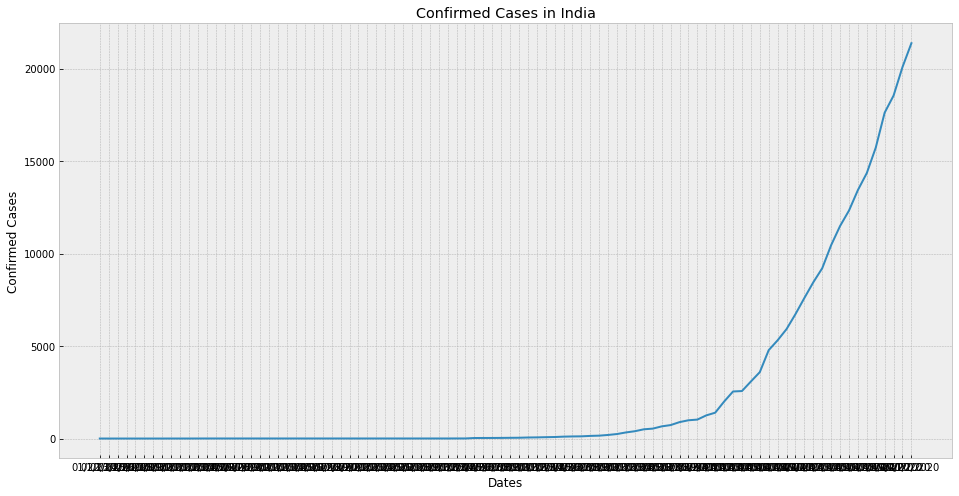

In [0]:
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases in India')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(df['India Confirmed Cases'])
plt.show()

In [0]:
df = df[['India Confirmed Cases']]
df.head(4)

,India Confirmed Cases
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0


In [0]:
future_days = 25
df['Predicted Cases'] = df[['India Confirmed Cases']].shift(-future_days)
df.head(4)

,India Confirmed Cases,Predicted Cases
Dates,,
01/22/2020,0,3.0
01/23/2020,0,3.0
01/24/2020,0,3.0
01/25/2020,0,3.0


In [0]:
df.tail(20)

,India Confirmed Cases,Predicted Cases
Dates,,
04/03/2020,2567,NaN
04/04/2020,3082,NaN
04/05/2020,3588,NaN
04/06/2020,4778,NaN
04/07/2020,5311,NaN
04/08/2020,5916,NaN
04/09/2020,6725,NaN
04/10/2020,7598,NaN
04/11/2020,8446,NaN


In [0]:
X = np.array(df.drop(['Predicted Cases'], 1))[:-future_days]
print(X)

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  1]
 [  1]
 [  1]
 [  2]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  5]
 [  5]
 [ 28]
 [ 30]
 [ 31]
 [ 34]
 [ 39]
 [ 43]
 [ 56]
 [ 62]
 [ 73]
 [ 82]
 [102]
 [113]
 [119]
 [142]
 [156]
 [194]
 [244]
 [330]
 [396]
 [499]
 [536]
 [657]
 [727]
 [887]
 [987]]


In [0]:
y = np.array(df['Predicted Cases'])[:-future_days]
print(y)

[3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 5.0000e+00 5.0000e+00 2.8000e+01
 3.0000e+01 3.1000e+01 3.4000e+01 3.9000e+01 4.3000e+01 5.6000e+01
 6.2000e+01 7.3000e+01 8.2000e+01 1.0200e+02 1.1300e+02 1.1900e+02
 1.4200e+02 1.5600e+02 1.9400e+02 2.4400e+02 3.3000e+02 3.9600e+02
 4.9900e+02 5.3600e+02 6.5700e+02 7.2700e+02 8.8700e+02 9.8700e+02
 1.0240e+03 1.2510e+03 1.3970e+03 1.9980e+03 2.5430e+03 2.5670e+03
 3.0820e+03 3.5880e+03 4.7780e+03 5.3110e+03 5.9160e+03 6.7250e+03
 7.5980e+03 8.4460e+03 9.2050e+03 1.0453e+04 1.1487e+04 1.2322e+04
 1.3430e+04 1.4352e+04 1.5722e+04 1.7615e+04 1.8539e+04 2.0080e+04
 2.1370e+04]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [0]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [0]:
x_future = df.drop(['Predicted Cases'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[ 28],
       [ 30],
       [ 31],
       [ 34],
       [ 39],
       [ 43],
       [ 56],
       [ 62],
       [ 73],
       [ 82],
       [102],
       [113],
       [119],
       [142],
       [156],
       [194],
       [244],
       [330],
       [396],
       [499],
       [536],
       [657],
       [727],
       [887],
       [987]])

In [0]:
tree_predictions = tree.predict(x_future)
print(tree_predictions)
print()
lr_predictions = lr.predict(x_future)
print(lr_predictions)

[ 1251.  1251.  1397.  1397.  2543.  2567.  3082.  3082.  4778.  4778.
  6725.  6725.  7598.  8446.  9205. 10453. 10453. 12322. 12322. 14352.
 15722. 17615. 18539. 20080. 20080.]

[ 1499.51390768  1552.05455057  1578.32487201  1657.13583633
  1788.48744354  1893.56872931  2235.08290806  2392.70483671
  2681.67837257  2918.11126555  3443.51769439  3732.49123025
  3890.1131589   4494.33055207  4862.11505226  5860.38726705
  7173.90333915  9433.15098317 11166.99219834 13872.83530686
 14844.83720022 18023.5460947  19862.46859564 24065.72002636
 26692.75217056]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


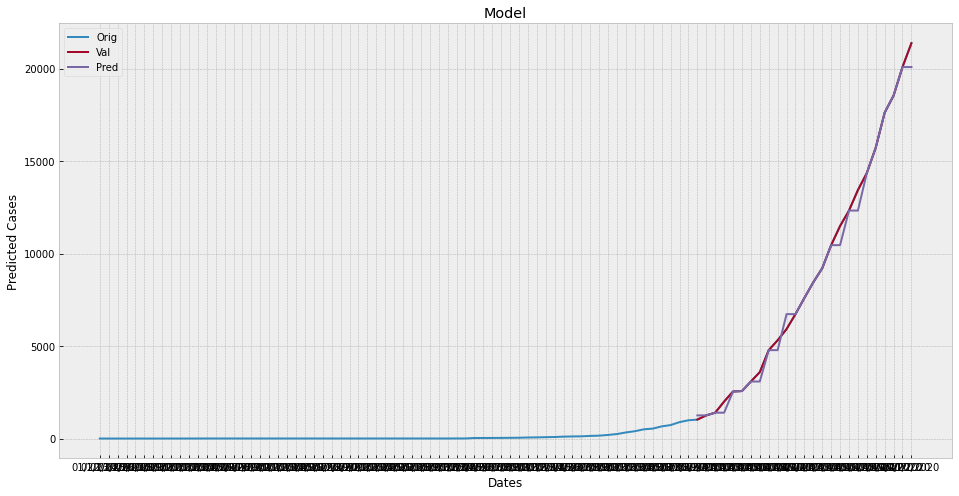

In [0]:
predictions = tree_predictions

valid = df[X.shape[0]:]
valid['Predicted Cases'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df['India Confirmed Cases'])
plt.plot(valid['India Confirmed Cases'])
plt.plot(valid['Predicted Cases'])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [0]:
valid

,India Confirmed Cases,Predicted Cases
Dates,,
03/29/2020,1024,1251.0
03/30/2020,1251,1251.0
03/31/2020,1397,1397.0
04/01/2020,1998,1397.0
04/02/2020,2543,2543.0
04/03/2020,2567,2567.0
04/04/2020,3082,3082.0
04/05/2020,3588,3082.0
04/06/2020,4778,4778.0


In [0]:
from sklearn.metrics import r2_score
score = r2_score(valid['India Confirmed Cases'], valid['Predicted Cases'])
print(score)

0.9943145990826611


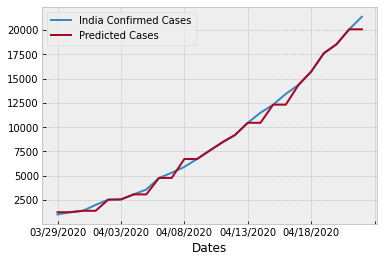

In [0]:
valid.plot()

In [0]:
df2= pd.read_csv('/content/drive/My Drive/COVID-19/COVID-19_Data/Total_cases_India.csv', index_col = 'Dates')
df2 = df2.rename(columns={"Confirmed Rcovered": "Confirmed Recovered"})
df2.head(10)

,India Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
01/22/2020,0,0,0
01/23/2020,0,0,0
01/24/2020,0,0,0
01/25/2020,0,0,0
01/26/2020,0,0,0
01/27/2020,0,0,0
01/28/2020,0,0,0
01/29/2020,0,0,0
01/30/2020,1,0,0


In [0]:
df2 = df2[['Confirmed Deaths']]

In [0]:
df2.head()

,Confirmed Deaths
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0
01/26/2020,0


In [0]:
future_days_deaths = 25
df2['Predicted Deaths'] = df2[['Confirmed Deaths']].shift(-future_days_deaths)
df2.tail(4)

,Confirmed Deaths,Predicted Deaths
Dates,,
04/19/2020,559,NaN
04/20/2020,592,NaN
04/21/2020,645,NaN
04/22/2020,681,NaN


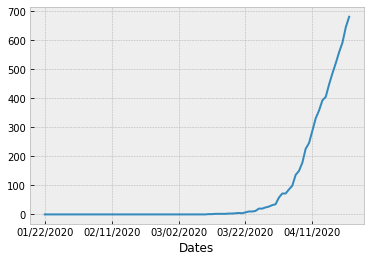

In [0]:
df2['Confirmed Deaths'].plot()

In [0]:
X1 = np.array(df2.drop(['Predicted Deaths'], 1))[:-future_days_deaths]
print(X1)

[[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 3]
 [ 4]
 [ 5]
 [ 4]
 [ 7]
 [10]
 [10]
 [12]
 [20]
 [20]
 [24]]


In [0]:
y1 = np.array(df2['Predicted Deaths'])[:-future_days_deaths]
print(y1)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   2.   2.
   2.   2.   3.   3.   4.   5.   4.   7.  10.  10.  12.  20.  20.  24.
  27.  32.  35.  58.  72.  72.  86.  99. 136. 150. 178. 226. 246. 288.
 331. 358. 393. 405. 448. 486. 521. 559. 592. 645. 681.]


In [0]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size = 0.25)


In [0]:
tree2 = DecisionTreeRegressor().fit(x_train2, y_train2)
lr2 = LinearRegression().fit(x_train2, y_train2)

In [0]:
x_future2 = df2.drop(['Predicted Deaths'], 1)[:-future_days_deaths]
x_future2 = x_future2.tail(future_days_deaths)
x_future2 = np.array(x_future2)
x_future2

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 4],
       [ 5],
       [ 4],
       [ 7],
       [10],
       [10],
       [12],
       [20],
       [20],
       [24]])

In [0]:
tree_predictions2 = tree2.predict(x_future2)
print(tree_predictions2)
print()
lr_predictions2 = lr2.predict(x_future2)
print(lr_predictions2)

[ 11.18918919  11.18918919  11.18918919  11.18918919  11.18918919
  11.18918919  11.18918919 117.5        117.5        191.33333333
 191.33333333 191.33333333 191.33333333 331.         331.
 358.         393.         358.         448.         486.
 486.         559.         645.         645.         681.        ]

[ 38.03794762  38.03794762  38.03794762  38.03794762  38.03794762
  38.03794762  38.03794762  72.68421234  72.68421234 107.33047706
 107.33047706 107.33047706 107.33047706 141.97674178 141.97674178
 176.6230065  211.26927122 176.6230065  280.56180066 384.50059482
 384.50059482 453.79312426 730.96324201 730.96324201 869.54830089]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


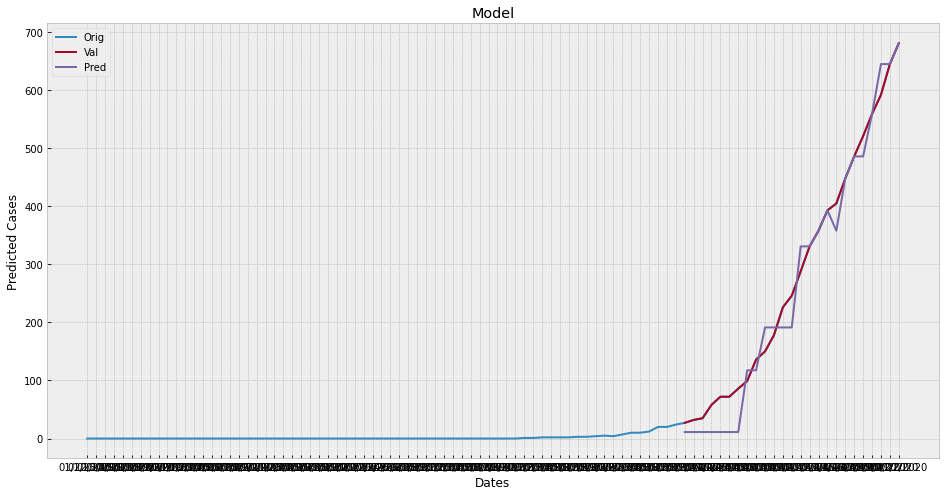

In [0]:
predictions2 = tree_predictions2

valid2 = df2[X1.shape[0]:]
valid2['Predicted Deaths'] = predictions2

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df2['Confirmed Deaths'])
plt.plot(valid2['Confirmed Deaths'])
plt.plot(valid2['Predicted Deaths'])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [0]:
from sklearn.metrics import r2_score
score2 = r2_score(valid2['Confirmed Deaths'], valid2['Predicted Deaths'])
print(score2)

0.9709861270459113


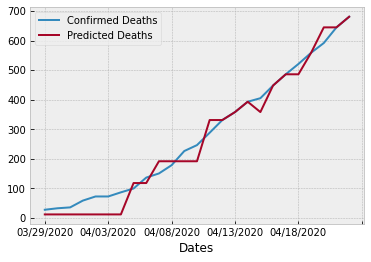

In [0]:
valid2.plot()

In [0]:
df3 = pd.read_csv("/content/drive/My Drive/COVID-19/COVID-19_Data/Total_cases_India.csv", index_col = 'Dates')
df3 = df3.rename(columns={"Confirmed Rcovered": "Confirmed Recovered"})
df3.head(5)

,India Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
01/22/2020,0,0,0
01/23/2020,0,0,0
01/24/2020,0,0,0
01/25/2020,0,0,0
01/26/2020,0,0,0


In [0]:
df3 = df3[['Confirmed Recovered']]

In [0]:
df3.head()

,Confirmed Recovered
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0
01/26/2020,0


In [0]:
future_days_recover = 25

In [0]:
df3['Predicted Recovered'] = df3[['Confirmed Recovered']].shift(-future_days_recover)
df3.tail(4)

,Confirmed Recovered,Predicted Recovered
Dates,,
04/19/2020,2854,NaN
04/20/2020,3273,NaN
04/21/2020,3975,NaN
04/22/2020,4370,NaN


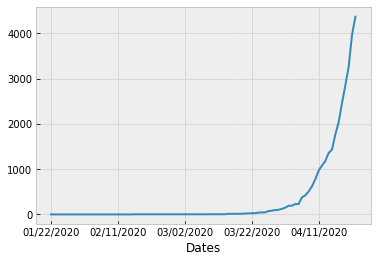

In [0]:
df3['Confirmed Recovered'].plot()

In [0]:
X2 = np.array(df3.drop(['Predicted Recovered'], 1))[:-future_days_recover]
print(X2)

[[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [13]
 [13]
 [14]
 [14]
 [15]
 [20]
 [23]
 [27]
 [27]
 [40]
 [43]
 [45]
 [73]
 [84]]


In [0]:
y2 = np.array(df3['Predicted Recovered'])[:-future_days_recover]
print(y2)

[3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 4.000e+00 4.000e+00 4.000e+00 4.000e+00 4.000e+00
 1.300e+01 1.300e+01 1.400e+01 1.400e+01 1.500e+01 2.000e+01 2.300e+01
 2.700e+01 2.700e+01 4.000e+01 4.300e+01 4.500e+01 7.300e+01 8.400e+01
 9.500e+01 1.020e+02 1.230e+02 1.480e+02 1.910e+02 1.920e+02 2.290e+02
 2.290e+02 3.750e+02 4.210e+02 5.060e+02 6.200e+02 7.740e+02 9.690e+02
 1.080e+03 1.181e+03 1.359e+03 1.432e+03 1.768e+03 2.041e+03 2.463e+03
 2.854e+03 3.273e+03 3.975e+03 4.370e+03]


In [0]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.25)


In [0]:
tree3 = DecisionTreeRegressor().fit(x_train3, y_train3)
lr3 = LinearRegression().fit(x_train3, y_train3)

In [0]:
x_future3 = df3.drop(['Predicted Recovered'], 1)[:-future_days_recover]
x_future3 = x_future3.tail(future_days_recover)
x_future3 = np.array(x_future3)
x_future3

array([[ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [13],
       [13],
       [14],
       [14],
       [15],
       [20],
       [23],
       [27],
       [27],
       [40],
       [43],
       [45],
       [73],
       [84]])

In [0]:
tree_predictions3 = tree3.predict(x_future3)
print(tree_predictions3)
print()
lr_predictions3 = lr3.predict(x_future3)
print(lr_predictions3)

[  53.47058824   53.47058824   53.47058824   53.47058824   53.47058824
   53.47058824  313.5         313.5         313.5         313.5
  313.5         774.          774.         1024.5        1024.5
 1181.         1359.         1432.         1432.         1432.
 2463.         2854.         3273.         4370.         4370.        ]

[ 166.89011678  166.89011678  166.89011678  166.89011678  166.89011678
  166.89011678  226.67737188  226.67737188  226.67737188  226.67737188
  226.67737188  764.7626677   764.7626677   824.54992279  824.54992279
  884.33717788 1183.27345333 1362.63521861 1601.78423897 1601.78423897
 2379.01855516 2558.38032043 2677.95483061 4351.99797317 5009.65777917]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


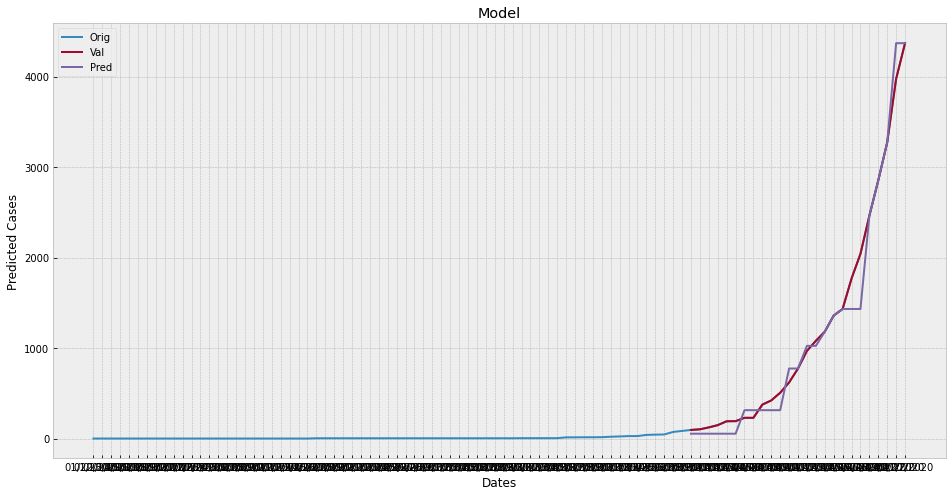

In [0]:
predictions3 = tree_predictions3

valid3 = df3[X2.shape[0]:]
valid3['Predicted Recovered'] = predictions3

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df3['Confirmed Recovered'])
plt.plot(valid3['Confirmed Recovered'])
plt.plot(valid3['Predicted Recovered'])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [0]:
valid3

,Confirmed Recovered,Predicted Recovered
Dates,,
03/29/2020,95,53.470588
03/30/2020,102,53.470588
03/31/2020,123,53.470588
04/01/2020,148,53.470588
04/02/2020,191,53.470588
04/03/2020,192,53.470588
04/04/2020,229,313.500000
04/05/2020,229,313.500000
04/06/2020,375,313.500000


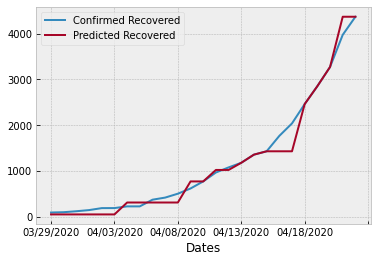

In [0]:
valid3.plot()

In [0]:
valid_final = valid.join(valid2.join(valid3))
valid_final

,India Confirmed Cases,Predicted Cases,Confirmed Deaths,Predicted Deaths,Confirmed Recovered,Predicted Recovered
Dates,,,,,,
03/29/2020,1024,1251.0,27,11.189189,95,53.470588
03/30/2020,1251,1251.0,32,11.189189,102,53.470588
03/31/2020,1397,1397.0,35,11.189189,123,53.470588
04/01/2020,1998,1397.0,58,11.189189,148,53.470588
04/02/2020,2543,2543.0,72,11.189189,191,53.470588
04/03/2020,2567,2567.0,72,11.189189,192,53.470588
04/04/2020,3082,3082.0,86,11.189189,229,313.500000
04/05/2020,3588,3082.0,99,117.500000,229,313.500000
04/06/2020,4778,4778.0,136,117.500000,375,313.500000


In [0]:
from sklearn.metrics import r2_score
score3 = r2_score(valid3['Confirmed Recovered'], valid3['Predicted Recovered'])
print(score3)

0.9793837304559064


In [0]:
average = (score + score2 + score3) / 3
average

0.9815614855281596